In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import os
import sys
import cv2
import imageio as io
from tqdm.notebook import tqdm
from keras.preprocessing import image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

from sklearn.model_selection import train_test_split


from sklearn.neighbors import KNeighborsClassifier
from keras.applications.vgg16 import preprocess_input

from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model

import PIL

import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Reshape, Rescaling
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [ ]:
os.chdir('/content/drive/MyDrive')

In [ ]:
def autoencoder_model():
    # Encoder
    model = Sequential(name='Convolutional_AutoEncoder_Model')
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 1), padding='same',
                     name='Encoding_Conv2D_1'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='same', name='Encoding_MaxPooling2D_1'))
    model.add(Conv2D(128, kernel_size=(3, 3), strides=1, activation='relu', padding='same', name='Encoding_Conv2D_2'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='same', name='Encoding_MaxPooling2D_2'))
    model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same', name='Encoding_Conv2D_3'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='same', name='Encoding_MaxPooling2D_3'))
    model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same', name='Encoding_Conv2D_4'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid', name='Encoding_MaxPooling2D_4'))
    #model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same', name='Encoding_Conv2D_5'))
    #model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
#togliere maxpooling, mettere average pooling alla fine solamente, mettere stride 2 nel conv2d
    # Decoder
    #model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same', name='Decoding_Conv2D_1'))
    #model.add(UpSampling2D((2, 2), name='Decoding_Upsamping2D_1'))
    model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same', name='Decoding_Conv2D_2'))
    model.add(UpSampling2D((2, 2), name='Decoding_Upsamping2D_2'))
    model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same', name='Decoding_Conv2D_3'))
    model.add(UpSampling2D((2, 2), name='Decoding_Upsamping2D_3'))
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', name='Decoding_Conv2D_4'))
    model.add(UpSampling2D((2, 2), name='Decoding_Upsamping2D_4'))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', name='Decoding_Conv2D_5'))
    model.add(UpSampling2D((2, 2), name='Decoding_Upsamping2D_5'))
    model.add(Conv2D(1, kernel_size=(3, 3), padding='same', activation='sigmoid', name='Decoding_Output'))
    return model

In [ ]:
#model=autoencoder_model()
#model.summary()

In [ ]:
def data_loader(directory):
  img_list = []
  lab_list = []
  for img in tqdm(os.listdir(directory)):
    lab_list.append(img)
    img = tf.keras.utils.load_img(directory+img, color_mode='grayscale', target_size=(128,128), interpolation='nearest')
    img_arr = tf.keras.utils.img_to_array(img)
    img_arr /=255
    img_list.append(img_arr)

  return img_list, lab_list

def display_img(file):
  plt.imshow(file[:,:,0], cmap='gray')

def load_image2(directory, file_name):
  file_path = directory+file_name
  img = tf.keras.utils.load_img(file_path, color_mode='grayscale', target_size=(128,128), interpolation='nearest')
  img = tf.keras.utils.img_to_array(img)
  img /=255
  return img


In [ ]:
def data_loader2(folder):
  img_list = []
  lab_list = []
  for f in tqdm(os.listdir(folder)):
    f = os.path.join(folder, f)
    f = f + '/'
    for img in tqdm(os.listdir(f)):
      lab_list.append(f+img)
      img = tf.keras.utils.load_img(f+img, color_mode='grayscale', target_size=(128,128), interpolation='nearest')
      img_arr = tf.keras.utils.img_to_array(img)
      img_arr /=255
      img_list.append(img_arr)

  return img_list, lab_list


In [ ]:
#image_path = 'dataset/augmented/n01443537(goldfish)/'
image_path = 'dataset_27k/'
dataset_file, dataset_label= data_loader2(image_path)
dataset_file = np.asarray(dataset_file)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/4863 [00:00<?, ?it/s]

  0%|          | 0/2623 [00:00<?, ?it/s]

  0%|          | 0/1446 [00:00<?, ?it/s]

  0%|          | 0/2112 [00:00<?, ?it/s]

  0%|          | 0/3098 [00:00<?, ?it/s]

  0%|          | 0/1668 [00:00<?, ?it/s]

  0%|          | 0/1866 [00:00<?, ?it/s]

  0%|          | 0/1820 [00:00<?, ?it/s]

  0%|          | 0/4821 [00:00<?, ?it/s]

  0%|          | 0/1862 [00:00<?, ?it/s]

In [ ]:
print(dataset_file.shape)
train_data, test_data, train_label, test_label = train_test_split(dataset_file, dataset_label, test_size = 0.2)
print(len(train_data),len(test_data))

(26179, 128, 128, 1)
20943 5236


In [ ]:
np.save('/content/drive/MyDrive/array/train_data',train_data)

In [ ]:
np.save('/content/drive/MyDrive/array/test_data',test_data)

In [ ]:
np.save('/content/drive/MyDrive/array/train_label',train_label)
np.save('/content/drive/MyDrive/array/test_label',test_label)

In [ ]:
train_data = np.load('/content/drive/MyDrive/array/train_data.npy')
test_data = np.load('/content/drive/MyDrive/array/test_data.npy')
train_label = np.load('/content/drive/MyDrive/array/train_label.npy')
test_label = np.load('/content/drive/MyDrive/array/test_label.npy')

dataset_27k/gatto/1467.jpeg


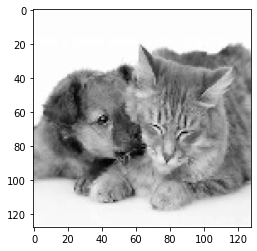

In [ ]:
display_img(train_data[100])
print(train_label[100])

In [ ]:
model=autoencoder_model()
model.compile(optimizer='Adam', loss='mse')
early_stopping = EarlyStopping(monitor='val_loss', mode='min',verbose=1,patience=6,min_delta=0.0001) 
checkpoint = ModelCheckpoint('/content/drive/My Drive/n+2_prova.h5', monitor='val_loss', mode='min', save_best_only=True) 
model.fit(train_data, train_data, epochs=30, batch_size=64, validation_data=(test_data,test_data), callbacks=[early_stopping,checkpoint])

Epoch 1/30
283/328 [========================>.....] - ETA: 14s - loss: 0.0252

KeyboardInterrupt: ignored

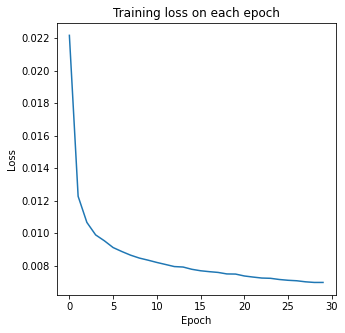

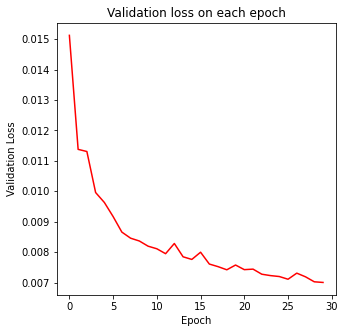

In [ ]:
plt.figure(figsize=(5,5))
epochs = [i for i in range(30)]
plt.plot(epochs,model.history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training loss on each epoch')
plt.show()

plt.figure(figsize=(5,5))
plt.plot(epochs,model.history.history['val_loss'],color='r')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation loss on each epoch')
plt.show()

In [ ]:
model = load_model("/content/drive/My Drive/n+1_prova.h5")
#model.compile(optimizer='Adam', loss='mse') 

In [ ]:
#model.summary()

In [ ]:
#history = model.history.history
sample_image = train_data[4]
sample_image = np.expand_dims(sample_image,axis=0)
image2 = model.predict(sample_image)
display_img(train_data[4])


NameError: ignored

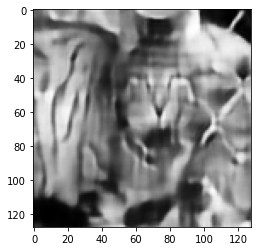

In [ ]:
display_img(image2[0])

In [ ]:
from keras import backend as K
def feature_extraction(model, data, layer = 5):

    """
    Creating a function to run the initial layers of the encoder model. (to get feature extraction from any layer of the model)
    Arguments:
    model - (Auto encoder model) - Trained model
    data - (np.ndarray) - list of images to get feature extraction from trained model
    layer - (int) - from which layer to take the features(by default = 5)
    Returns:
    pooled_array - (np.ndarray) - array of extracted features of given images
    """

    encoded = K.function([model.layers[0].input],[model.layers[layer].output])
    encoded_array = encoded([data])[0]
    pooled_array = encoded_array.max(axis=-1)
    return encoded_array


In [ ]:
gallery_path = '/content/drive/MyDrive/dataset/validation/gallery/'
query_path = '/content/drive/MyDrive/dataset/validation/query/'

gallery_data, gallery_label = data_loader2(gallery_path)
query_data, query_label = data_loader2(query_path)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
gallery_data = np.asarray(gallery_data)
query_data = np.asarray(query_data)

In [ ]:
gallery_data.shape

(550, 128, 128, 1)

In [ ]:
gallery_features = feature_extraction(model, gallery_data, layer = 7)
query_features = feature_extraction(model, query_data, layer = 7)

In [ ]:
gallery_features = gallery_features.reshape(gallery_features.shape[0], gallery_features.shape[1]*gallery_features.shape[2]*gallery_features.shape[3])
query_features = query_features.reshape(query_features.shape[0], query_features.shape[1]*query_features.shape[2]*query_features.shape[3])

In [ ]:
print(gallery_features.shape)
print(query_features.shape)

(550, 32768)
(100, 32768)


In [ ]:
query_features[0]
query_label[0]

'/content/drive/MyDrive/dataset/validation/query/n03793489(mouse)/n03793489_54626.JPEG'

In [ ]:
### metric part ### va fatta su flatten

In [ ]:
def load_image3(file_path):
  img = tf.keras.utils.load_img(file_path, color_mode='grayscale', target_size=(128,128), interpolation='nearest')
  img = tf.keras.utils.img_to_array(img)
  img /=255
  return img

In [ ]:
pairwise_dist = scipy.spatial.distance.cdist(query_features, gallery_features, 'minkowski', p=2.)

In [ ]:
pairwise_dist[0][2]

2.847260359516236

In [ ]:
indices = np.argsort(pairwise_dist, axis=-1)

In [ ]:
indices.shape

(100, 550)

In [ ]:
indices[0][:8]

array([ 24,  16,  46, 341,  65, 371, 546,  49])

In [ ]:
def k_nn(query_num, k):
  print(query_label[query_num])
  immagine = load_image3(query_label[query_num])
  plt.imshow(immagine[:,:,0], cmap='gray')

  fig = plt.figure(figsize=(25,10))
  for i, match in enumerate(indices[query_num][:k]):
    print(gallery_label[match])
    nn = load_image3(gallery_label[match])
    fig.add_subplot(1,len(indices[query_num][:k]),i+1)
    plt.imshow(nn[:,:,0], cmap='gray')


/content/drive/MyDrive/dataset/validation/query/n01518878(ostrich)/n01518878_2367.JPEG
/content/drive/MyDrive/dataset/validation/gallery/n01644900(tailed_frog)/n01644900_1447.JPEG
/content/drive/MyDrive/dataset/validation/gallery/n01518878(ostrich)/n01518878_3995.JPEG
/content/drive/MyDrive/dataset/validation/gallery/n01518878(ostrich)/n01518878_3436.JPEG
/content/drive/MyDrive/dataset/validation/gallery/n01443537(goldfish)/n01443537_19245.JPEG
/content/drive/MyDrive/dataset/validation/gallery/n01443537(goldfish)/n01443537_21855.JPEG
/content/drive/MyDrive/dataset/validation/gallery/n01632777(axolotl)/n01632777_16801.JPEG
/content/drive/MyDrive/dataset/validation/gallery/n01518878(ostrich)/n01518878_7790.JPEG
/content/drive/MyDrive/dataset/validation/gallery/n01632777(axolotl)/n01632777_15539.JPEG


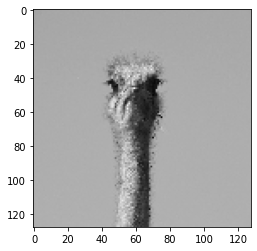

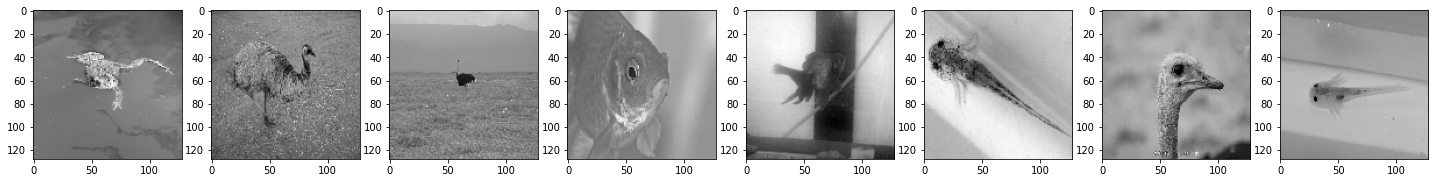

In [ ]:
k_nn(10,8)

In [ ]:
#### COARSE EVALUATION ###

In [ ]:
goldfish = 'goldfish'
axolotl = 'axolotl'
ostrich = 'ostrich'
terrier = 'terrier' 
frog = 'frog'
turtle = 'turtle'
peacock = 'peacock'
snail = 'snail'
sea_lion = 'sea_lion'
mouse = 'mouse'


    

def evaluation(query_num, k):
  count = 0

  if goldfish in query_label[query_num]:
    class_name = 'goldfish'
  if axolotl in query_label[query_num]:
    class_name = 'axolotl'
  if ostrich in query_label[query_num]:
    class_name = 'ostrich'
  if terrier in query_label[query_num]:
    class_name = 'terrier'
  if frog in query_label[query_num]:
    class_name = 'frog'
  if turtle in query_label[query_num]:
    class_name = 'turtle'
  if peacock in query_label[query_num]:
    class_name = 'peacock'
  if snail in query_label[query_num]:
    class_name = 'snail'
  if sea_lion in query_label[query_num]:
    class_name = 'sea_lion'
  if mouse in query_label[query_num]:
    class_name = 'mouse'

  for match in indices[query_num][:k]:
    if class_name in gallery_label[match]:
        count += 1
  return count


In [ ]:
len(query_label)

100

In [ ]:
n_neigh = 10
correct = 0
for i in range(len(query_label)):
  correct += evaluation(i, n_neigh)

accuracy = correct/(n_neigh*len(query_label))

print(accuracy)
print(correct)


0.164
164


In [ ]:
def get_batches(data, batch_size=1000):

    """
    Taking batch of images for extraction of images.
    Arguments:
    data - (np.ndarray or list) - list of image array to get extracted features.
    batch_size - (int) - Number of images per each batch
    Returns:
    list - extracted features of each images
    """

    if len(data) < batch_size:
        return [data]
    n_batches = len(data) // batch_size
    
    # If batches fit exactly into the size of df.
    if len(data) % batch_size == 0:
        return [data[i*batch_size:(i+1)*batch_size] for i in range(n_batches)]   

    # If there is a remainder.
    else:
        return [data[i*batch_size:min((i+1)*batch_size, len(data))] for i in range(n_batches+1)]

In [ ]:
d = np.concatenate([train_data,test_data],axis=0)
d.shape

(500, 128, 128, 3)

In [ ]:
X_encoded = []
i=0
# Iterate through the full training set.
for batch in get_batches(d, batch_size=100):
    i+=1
    # This line runs our pooling function on the model for each batch.#layer 5 default
    X_encoded.append(feature_extraction(model, batch))
    
X_encoded = np.concatenate(X_encoded)

X_encoded.shape 

(500, 16, 16, 256)

In [ ]:
X_encoded_reshape = X_encoded.reshape(X_encoded.shape[0], X_encoded.shape[1]*X_encoded.shape[2]*X_encoded.shape[3])
print('Encoded shape:', X_encoded_reshape.shape)

Encoded shape: (500, 65536)


In [ ]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
 
transform = TSNE 
trans = transform(n_components=2) 
values = trans.fit_transform(X_encoded_reshape) 

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


if Number of clusters: 4


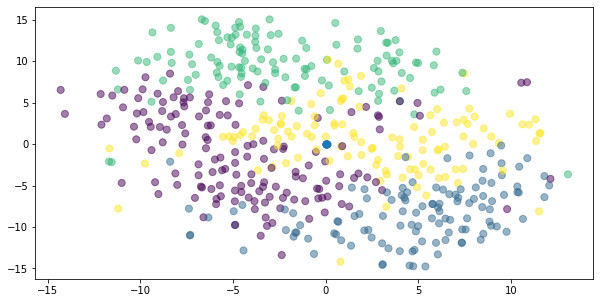

if Number of clusters: 5


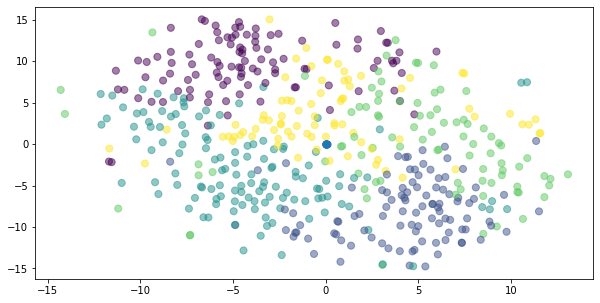

if Number of clusters: 6


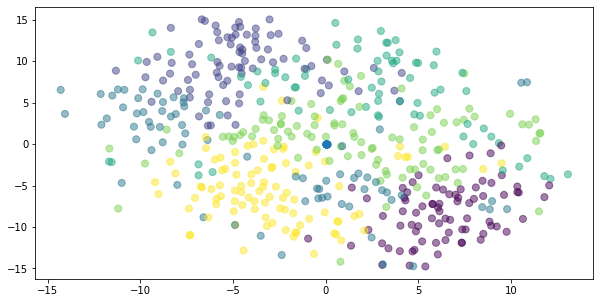

if Number of clusters: 7


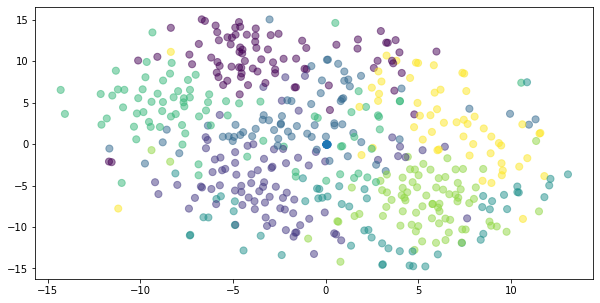

In [ ]:
Nclust = [4,5,6,7]
#Nclust = [8, 9, 10, 11, 12]
for k in Nclust:
    print("if Number of clusters: "+str(k))
    kmeans = KMeans(n_clusters = k, random_state=0).fit(X_encoded_reshape)
    labels=kmeans.labels_
    centroids = kmeans.cluster_centers_
    plt.figure(figsize=(10,5)) 
    plt.subplot(1,1,1)
    plt.scatter(values[:,0], values[:,1], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
    plt.scatter(centroids[:, 0], centroids[:, 1], c=None, s=50)
    plt.show()

In [ ]:
#Training the model with optimial K value (6 in our case?)
kmeans = KMeans(n_clusters = 6, random_state=0).fit(X_encoded_reshape)
labels=kmeans.labels_
centroids = kmeans.cluster_centers_

In [ ]:
lisp=train_label
lisp.extend(test_label)
print(len(lisp))

500


In [ ]:
clusters_features = []
cluster_files=[]
for i in range(6):
    i_cluster = []
    i_labels=[]
    for iter,j in enumerate(kmeans.labels_):
        if j==i:
            i_cluster.append(X_encoded_reshape[iter])
            i_labels.append(lisp[iter])
    i_cluster = np.array(i_cluster)
    clusters_features.append(i_cluster)
    cluster_files.append(i_labels)

labels=[]
data=[]
files=[]
for iter,i in enumerate(clusters_features):
    data.extend(i)
    labels.extend([iter for i in range(i.shape[0])])
    files.extend(cluster_files[iter])
print(np.array(labels).shape)
print(np.array(data).shape)
print(np.array(files).shape)

(500,)
(500, 65536)
(500,)


In [ ]:
data = np.asarray(data)
labels = np.asarray(labels)

In [ ]:
files[10]
#labels[10]

'259.jpg'

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7,algorithm='ball_tree',n_jobs=-1)
knn.fit(data,labels)

KNeighborsClassifier(algorithm='ball_tree', n_jobs=-1, n_neighbors=7)

In [ ]:
def pred(query_file, N=8):

    """
    Making predictions for the query images and returns N similar images from the dataset.
    We can either pass filename or the url for the image.
    Arguments:
    query_file - path completo immagine
    label - (string) - file name of the query image.
    N - (int) - Number of images to be returned
    """
    img = tf.keras.utils.load_img(query_file, color_mode='rgb', target_size=(128,128), interpolation='nearest')
    img_arr = tf.keras.utils.img_to_array(img)
    img_arr /=255
    img_arr = np.expand_dims(img_arr,axis=0)
    #img_data = preprocess_input(img_arr)
    feature = K.function([model.layers[0].input],[model.layers[5].output])
    feature_array = feature([img_arr])[0]
    #feature.flatten()
    #feature.reshape(1,-1)
    res1 = knn.kneighbors(feature_array.reshape(1,-1),return_distance=True,n_neighbors=N)

    res_list = []
    for i in res1[1][0]:
      res_list.append(files[i])
    
    fig = plt.figure(figsize=(25,10))
    for i, item in enumerate(res_list):
      imag = load_image2(image_path, item)
      fig.add_subplot(1,len(res_list),i+1)
      plt.imshow(imag)
    

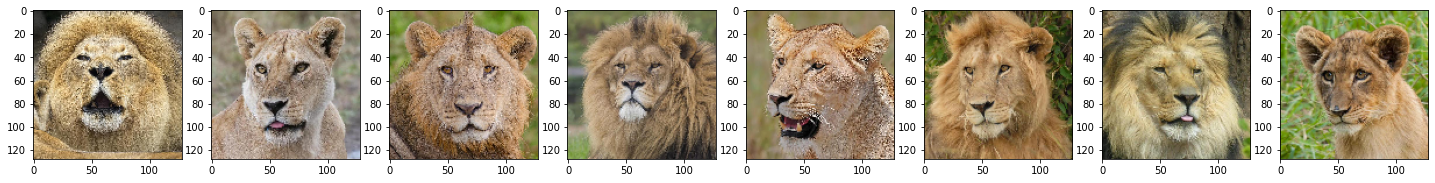

In [ ]:
query_path = 'animals_unlabeled/154.jpg'
pred(query_path)

In [ ]:
res_list = []
for i in pred(query_path)[1][0]:
  res_list.append(files[i])


In [ ]:
res_list

['163.jpg',
 '489.jpg',
 '216.jpg',
 '445.jpg',
 '431.jpg',
 '3.jpg',
 '150.jpg',
 '417.jpg']

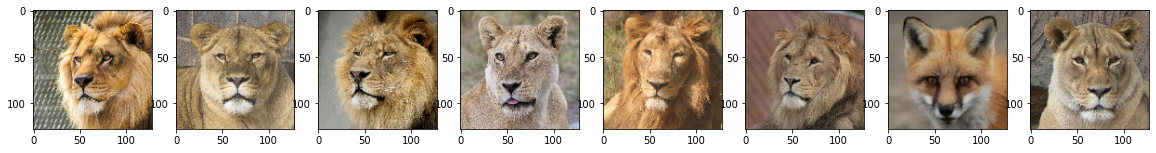

In [ ]:
fig = plt.figure(figsize=(20,8))
for i, item in enumerate(res_list):
  imag = load_image(image_path, item)
  fig.add_subplot(1,len(res_list),i+1)
  plt.imshow(imag)